# Projet: le double pendule

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 3. Résolution de l'équation différentielle avec le schéma Euler explicite

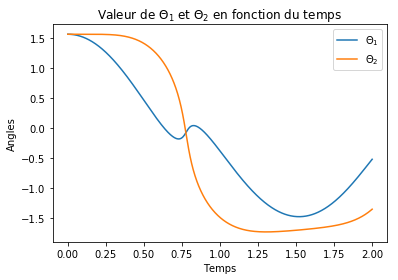

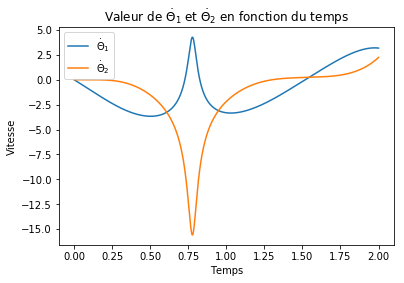

In [7]:
#question 1
def f(y,l1,l2,m1,m2):
    y1=y[0,0]; y2=y[1,0]; y3=y[2,0]; y4=y[3,0]; g=9.8
    s1=(-m2*l1*(y4**2)*sin(y1-y2)*cos(y1-y2)+g*m2*sin(y2)*cos(y1-y2)-m2*l2*(y4**2)*sin(y1-y2)-g*(m1+m2)*sin(y1))/(l1*(m1+m2)-m2*l1*(cos(y1-y2)**2))
    s2=(m2*l2*(y4**2)*sin(y1-y2)*cos(y1-y2)+g*(m1+m2)*sin(y1)*cos(y1-y2)+(m1+m2)*l1*(y4**2)*sin(y1-y2)-g*(m1+m2)*sin(y2))/(l2*(m1+m2)-m2*l2*(cos(y1-y2)**2))
    return array([[y3],[y4],[s1],[s2]])

#question 2
def stepEuler(yt,h,l1,l2,m1,m2):
    return yt+h*f(yt,l1,l2,m1,m2)

#question 3
def listeTrajectoire(y0,p,T,l1,l2,m1,m2):
    l=[]
    for i in range(p+1):
        l.append(y0)
        y0=stepEuler(y0,T/p,l1,l2,m1,m2)
    return l

#question 4
y0=array([[pi/2],[pi/2],[0],[0]])
T=2
l=listeTrajectoire(y0,1000,T,1,1,1,1)

#question 5.a
def plot_angles(l,T):
    x=linspace(0,T,len(l),endpoint=True)
    teta1=[]; teta2=[]
    for i in range(len(l)):
        teta1.append(l[i][0,0])
        teta2.append(l[i][1,0])
    fig=figure()
    plot(x,teta1,label='$\Theta_{1}$')
    plot(x,teta2,label='$\Theta_{2}$')
    𝚝𝚒𝚝𝚕𝚎('Valeur de $\Theta_{1}$ et $\Theta_{2}$ en fonction du temps')
    𝚡𝚕𝚊𝚋𝚎𝚕("Temps")
    𝚢𝚕𝚊𝚋𝚎𝚕("Angles")
    legend()
plot_angles(l,T)    
plt.savefig('evol-angle.pdf')

def evol_vitesses_angulaires(l,T):
    x=linspace(0,T,len(l),endpoint=True)
    teta_point1=[]; teta_point2=[]
    for i in range(len(l)):
        teta_point1.append(l[i][2,0])
        teta_point2.append(l[i][3,0])
    fig=figure()
    plot(x,teta_point1,label='$\dot{\Theta}_{1}$')
    plot(x,teta_point2,label='$\dot{\Theta}_{2}$')
    𝚝𝚒𝚝𝚕𝚎('Valeur de $\dot{\Theta}_{1}$ et $\dot{\Theta}_{2}$ en fonction du temps')
    𝚡𝚕𝚊𝚋𝚎𝚕("Temps")
    𝚢𝚕𝚊𝚋𝚎𝚕("Vitesse")
    legend()
evol_vitesses_angulaires(l,T)   
plt.savefig('evol_vitesses_angulaires.pdf')



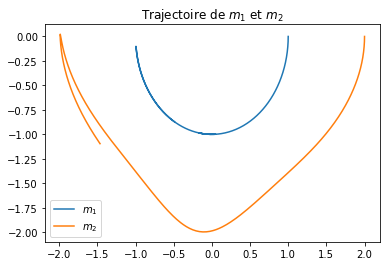

In [8]:
#question 5.b
def plot_trajectoire(l,l1,l2):
    x1=[]; x2=[]; y1=[]; y2=[]
    for i in range(len(l)):
        x1.append(l1*sin(l[i][0,0]))
        y1.append(-l1*cos(l[i][0,0]))
        x2.append(l1*sin(l[i][0,0])+l2*sin(l[i][1,0]))
        y2.append(-l1*cos(l[i][0,0])-l2*cos(l[i][1,0]))
    fig=figure()
    plot(x1,y1,label='$m_{1}$')
    plot(x2,y2,label='$m_{2}$')
    𝚝𝚒𝚝𝚕𝚎('Trajectoire de $m_{1}$ et $m_{2}$')
    legend()
plot_trajectoire(l,1,1)
plt.savefig('trajectoire.pdf')


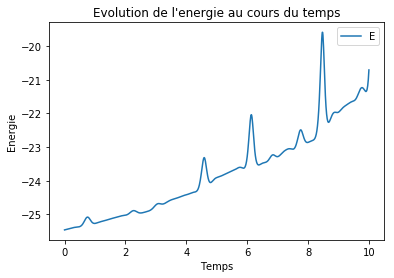

In [9]:
#question 6.a
def energie(y,l1,l2,m1,m2):
    Ec=(1/2)*(m1+m2)*(y[2,0]**2)*(l1**2)+(1/2)*m2*(y[3,0]**2)*(l2**2)+m2*y[2,0]*y[3,0]*l1*l2*cos(y[0,0]-y[1,0])
    Ep=-(m1+m2)*9.8*l1*cos(y[0,0])-m2*l2*9.8*cos(y[1,0])
    return Ec+Ep

#question 6.b
def evol_energy(l,T,l1,l2,m1,m2):
    x=linspace(0,T,len(l),endpoint=True)
    E=[]
    for i in range(len(l)):
        E.append(energie(l[i],l1,l2,m1,m2))
    fig=figure()
    plot(x,E,label='E')
    𝚡𝚕𝚊𝚋𝚎𝚕("Temps")
    𝚢𝚕𝚊𝚋𝚎𝚕("Energie")
    𝚝𝚒𝚝𝚕𝚎("Evolution de l'energie au cours du temps")
    legend()

#question 6.c
y0=array([[pi/6],[pi/6],[0],[0]])
T=10
l=listeTrajectoire(y0,1000,T,1,1,1,1)
evol_energy(l,T,1,1,1,1)

#### Question 6.c : Commentaire
Le schéma d'Euler ne respecte pas la conservation de l'énergie. L'énergie croit au cours du temps et passe de -25.5 J a -20 J. Il a l'inconvenient de propager les erreurs à chaque étape O(h^2) et meme de les amplifier.

## 4. Résolution de l'équation différentielle avec le schéma de Verlet

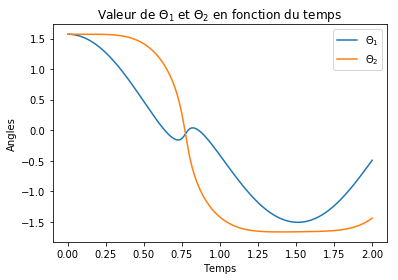

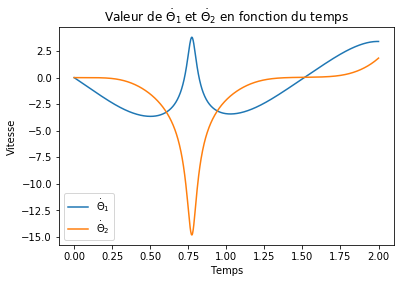

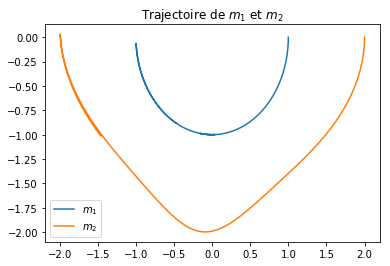

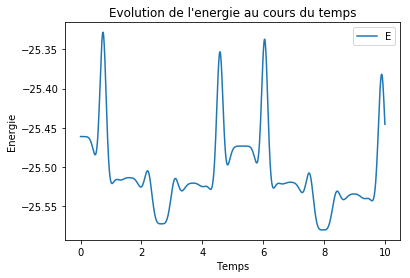

In [10]:
#question 1
def stepVerlet(yt, h, l1, l2, m1, m2):
    g=9.8
    y1=yt[0,0]+h*yt[2,0]+(h**2)*(1/2)*((-m2*l1*(yt[3,0]**2)*sin(yt[0,0]-yt[1,0])*cos(yt[0,0]-yt[1,0])+g*m2*sin(yt[1,0])*cos(yt[0,0]-yt[1,0])-m2*l2*(yt[3,0]**2)*sin(yt[0,0]-yt[1,0])-g*(m1+m2)*sin(yt[0,0]))/(l1*(m1+m2)-m2*l1*(cos(yt[0,0]-yt[1,0])**2)))
    y2=yt[1,0]+h*yt[3,0]+(h**2)*(1/2)*((m2*l2*(yt[3,0]**2)*sin(yt[0,0]-yt[1,0])*cos(yt[0,0]-yt[1,0])+g*(m1+m2)*sin(yt[0,0])*cos(yt[0,0]-yt[1,0])+(m1+m2)*l1*(yt[3,0]**2)*sin(yt[0,0]-yt[1,0])-g*(m1+m2)*sin(yt[1,0]))/(l2*(m1+m2)-m2*l2*(cos(yt[0,0]-yt[1,0])**2)))
    w=array([[y1],[y2],[yt[2,0]],[yt[3,0]]])
    y3=yt[2,0]+h*(1/2)*(((-m2*l1*(w[3,0]**2)*sin(w[0,0]-w[1,0])*cos(w[0,0]-w[1,0])+g*m2*sin(w[1,0])*cos(w[0,0]-w[1,0])-m2*l2*(w[3,0]**2)*sin(w[0,0]-w[1,0])-g*(m1+m2)*sin(w[0,0]))/(l1*(m1+m2)-m2*l1*(cos(w[0,0]-w[1,0])**2))+((-m2*l1*(yt[3,0]**2)*sin(yt[0,0]-yt[1,0])*cos(yt[0,0]-yt[1,0])+g*m2*sin(yt[1,0])*cos(yt[0,0]-yt[1,0])-m2*l2*(yt[3,0]**2)*sin(yt[0,0]-yt[1,0])-g*(m1+m2)*sin(yt[0,0]))/(l1*(m1+m2)-m2*l1*(cos(yt[0,0]-yt[1,0])**2)))))
    y4=yt[3,0]+h*(1/2)*(((m2*l2*(w[3,0]**2)*sin(w[0,0]-w[1,0])*cos(w[0,0]-w[1,0])+g*(m1+m2)*sin(w[0,0])*cos(w[0,0]-w[1,0])+(m1+m2)*l1*(w[3,0]**2)*sin(w[0,0]-w[1,0])-g*(m1+m2)*sin(w[1,0]))/(l2*(m1+m2)-m2*l2*(cos(w[0,0]-w[1,0])**2)))+((m2*l2*(yt[3,0]**2)*sin(yt[0,0]-yt[1,0])*cos(yt[0,0]-yt[1,0])+g*(m1+m2)*sin(yt[0,0])*cos(yt[0,0]-yt[1,0])+(m1+m2)*l1*(yt[3,0]**2)*sin(yt[0,0]-yt[1,0])-g*(m1+m2)*sin(yt[1,0]))/(l2*(m1+m2)-m2*l2*(cos(yt[0,0]-yt[1,0])**2))))
    return array([[y1],[y2],[y3],[y4]])
      
#question 2
def listeTrajectoireVerlet(y0,p,T,l1,l2,m1,m2):
    l=[]
    for i in range(p+1):
        l.append(y0)
        y0=stepVerlet(y0,T/p,l1,l2,m1,m2)
    return l
                         
y0=array([[pi/2],[pi/2],[0],[0]])
T=2
l2=listeTrajectoireVerlet(y0,1000,T,1,1,1,1)
plot_angles(l2,T)
evol_vitesses_angulaires(l2,T)
plot_trajectoire(l2,1,1)

#question 3
y0=array([[pi/6],[pi/6],[0],[0]])
T=10
l3=listeTrajectoireVerlet(y0,1000,T,1,1,1,1)
evol_energy(l3,T,1,1,1,1)

### Question 3 : commentaire
L'energie est mieux conservée que pour le schéma d'Euler explicite. On voit que l'énergie pour le schéma de Verlet oscille entre -25.60 J et -25.30 J sur l'intervalle [0,T=10s]. On peut dire que l'énergie est quasi constante. Le schéma de Verlet est donc plus précis que celui d'Euler.

## 5. Mouvement chaotique et sensibilité par rapport aux conditions initiales

In [13]:
#question 1
def plot_espace_phases(y0,p,T,l1,l2,m1,m2):
    l=listeTrajectoireVerlet(y0,p,T,l1,l2,m1,m2)
    theta1=[]; theta2=[] ;theta_point1=[]; theta_point2=[]
    for i in range(len(l)):
        theta1.append(l[i][0,0])
        theta2.append(l[i][1,0])
        theta_point1.append(l[i][2,0])
        theta_point2.append(l[i][3,0])
    fig=figure()
    plot(theta1,theta_point1,label='$C_{1}$')
    plot(theta2,theta_point2,label='$C_{2}$')
    𝚡𝚕𝚊𝚋𝚎𝚕("$\Theta$")
    𝚢𝚕𝚊𝚋𝚎𝚕("$\dot{\Theta}$")
    title("Tracé de l'espace de phases")
    legend()

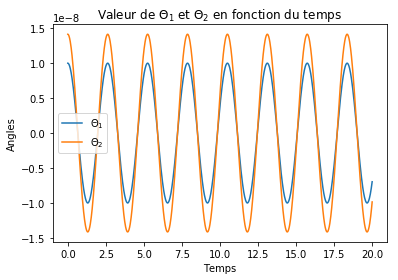

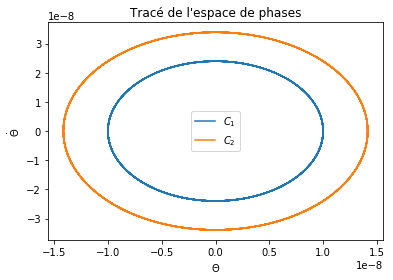

In [12]:
#question 2.a : regime de petite oscillations
y0=array([[10**(-8)],[sqrt(2)*10**(-8)],[0],[0]])
T=20; p=1000
l=listeTrajectoireVerlet(y0,p,T,1,1,1,1)
plot_angles(l,T)
plot_espace_phases(y0,1000,20,1,1,1,1)

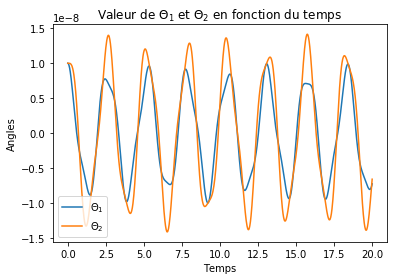

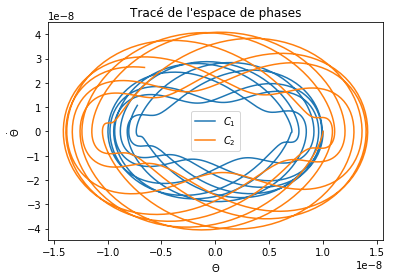

In [14]:
#question 2.b
y0=array([[10**(-8)],[10**(-8)],[0],[0]])
T=20; p=1000
l=listeTrajectoireVerlet(y0,p,T,1,1,1,1)
plot_angles(l,T)
plot_espace_phases(y0,1000,20,1,1,1,1)

On remarque que les angles $\Theta_{1}$  et $\Theta_{2}$ n'ont plus un comportement periodique et régulier. On voit qu'une modification infinitésimale de l'angle $\Theta_{2}$ (($\sqrt{2}$-1)*$10^{-8}$) entraîne une trajectoire très différente.

### question 3

In [15]:
def tracerAlpha(alpha):
    y0=array([[alpha],[alpha],[0],[0]])
    T=10; p=1000
    l=listeTrajectoireVerlet(y0,p,T,1,1,1,1)
    plot_angles(l,T)
    plot_espace_phases(y0,p,T,1,1,1,1)


## α=1e-08

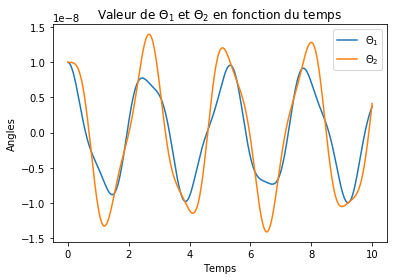

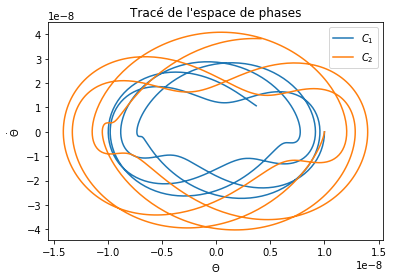

In [16]:
alpha=1e-08
tracerAlpha(alpha)

## α=0.005

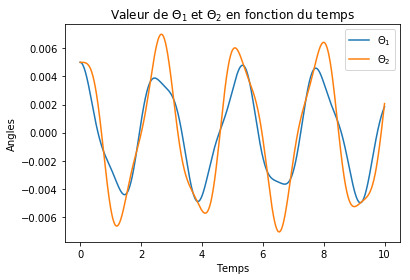

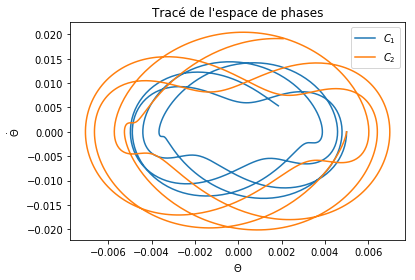

In [17]:
alpha=0.005
tracerAlpha(alpha)

## α=1

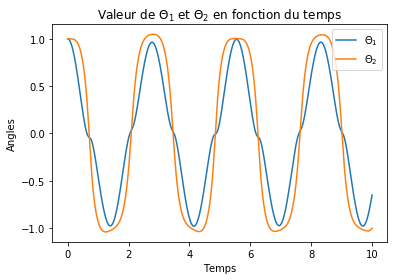

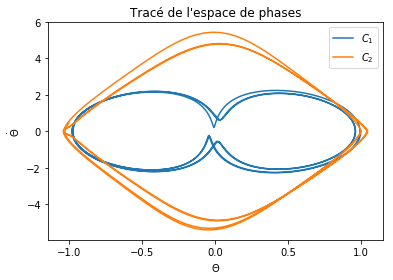

In [18]:
alpha=1
tracerAlpha(alpha)

## α=1.2

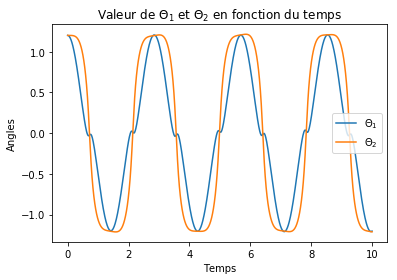

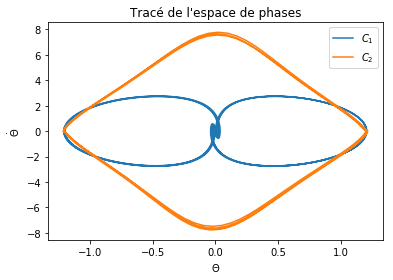

In [19]:
alpha=1.2
tracerAlpha(alpha)

## α=1.7

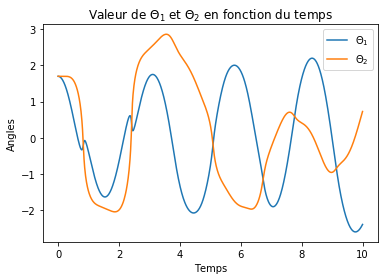

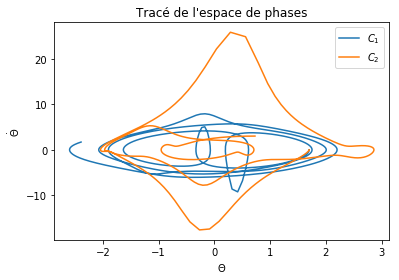

In [21]:
alpha=1.7
tracerAlpha(alpha)

## α=1.9

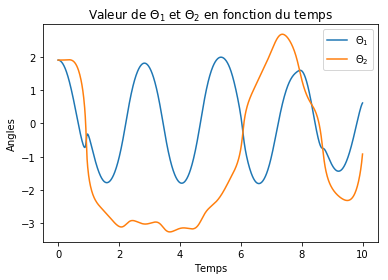

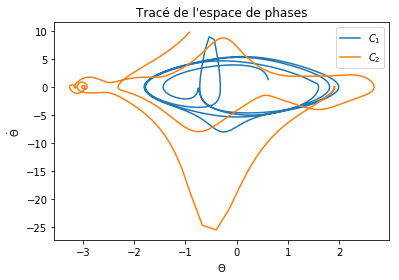

In [20]:
alpha=1.9
tracerAlpha(alpha)

On remarque que les systèmes sont très sensibles à une faible variation des conditions initiales. De plus, le système ne prend pas de nouvelles valeurs en augmentant le temps T. Il y a donc une forte récurrence. C'est ce qui caractérise un système chaotique.
On remarque que plus α est grand, plus le mouvement est original : on perd la propriété de périodicité.
Ceci est dû au fait qu'un angle α plus grand correspond à une énergie potentielle de pesanteur plus élevée